# Bank Problem

## Dependencies 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shap
#https://www.kaggle.com/janiobachmann/bank-marketing-dataset

## Data

In [2]:
dataset = pd.read_csv('bank.csv')
df =  pd.DataFrame(dataset)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

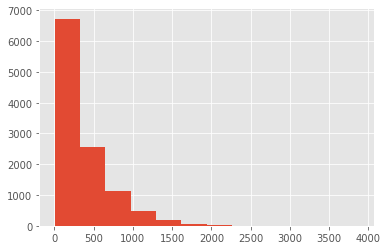

In [4]:
dur_x = df["duration"]
plt.style.use('ggplot')
plt.hist(dur_x, bins = 12)
plt.show()

In [5]:
train_df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','deposit'])
train_df = train_df.drop(columns= 'duration')


train_df.head(5)

,age,balance,day,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,deposit_no,deposit_yes
0,59,2343,5,1,-1,0,unknown,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,56,45,5,1,-1,0,unknown,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,41,1270,5,1,-1,0,unknown,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,55,2476,5,1,-1,0,unknown,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,54,184,5,2,-1,0,unknown,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
train_df.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'deposit_no', 'deposit_yes'],
      dtype='object')

## Train Test Split

In [7]:
X = train_df[['age', 'balance', 'campaign', 'pdays', 'previous',
        'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']]
y = train_df['deposit_yes'].values.reshape(-1, 1)
print(X.shape, y.shape)

(11162, 45) (11162, 1)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## XGB Classifier

In [9]:
from xgboost import XGBClassifier

In [10]:
my_model = XGBClassifier(n_estimators=50, learning_rate=0.1)
my_model.fit(X_train, y_train,  
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test.ravel())],
             verbose=False)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [11]:
scores = my_model.score(X_test, y_test)
scores

0.717305625223934

## Confustion Matrix

In [12]:
import seaborn as sns

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = my_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1235,  268],
       [ 521,  767]], dtype=int64)

In [14]:
conf_matrix_neg = conf_matrix[0,1]+conf_matrix[1,0]
conf_matrix_pos = conf_matrix[0,0]+conf_matrix[1,1]
conf_matrix_score = 1 - conf_matrix_neg/conf_matrix_pos
conf_matrix_score

0.6058941058941059

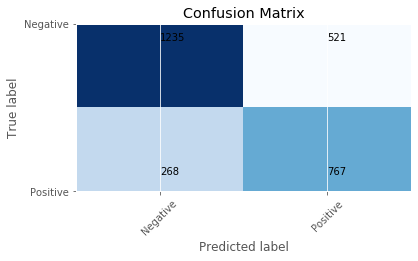

In [15]:
plt.clf()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

plt.text(0,0+.1, str(conf_matrix[0][0]))
plt.text(0,1-.1, str(conf_matrix[0][1]))
plt.text(1,0+.1, str(conf_matrix[1][0]))
plt.text(1,1-.1, str(conf_matrix[1][1]))


plt.show()

In [16]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_test, y_pred))

Gradient Boost Classifier Score:  0.7085934239182091


## Shap Visualizations 

In [17]:
import shap
shap_values = shap.TreeExplainer(my_model).shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


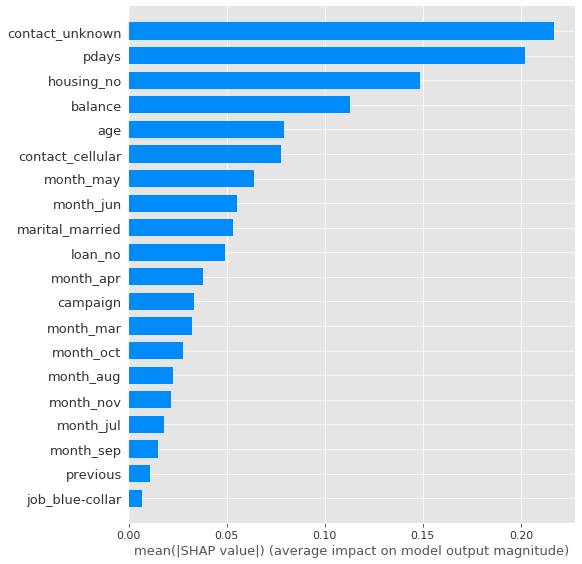

In [18]:
shap.summary_plot(shap_values, X_train, X_train.columns, plot_type="bar")

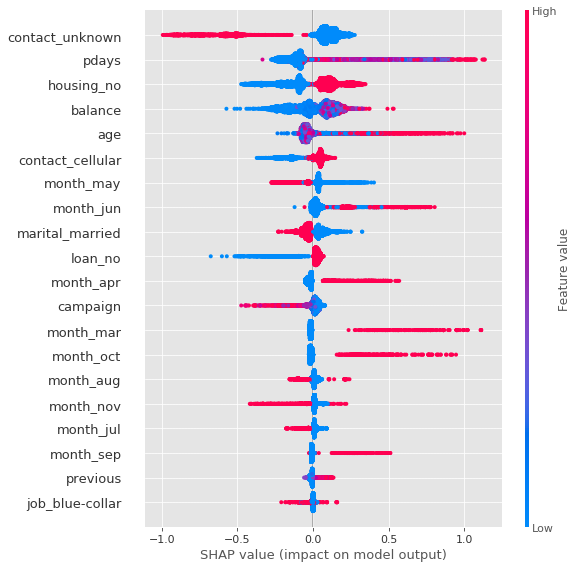

In [19]:
f = plt.figure()
shap.summary_plot(shap_values, X_train)

## Making sense of the results 

In [20]:
contact_results = df.groupby(["contact","deposit"]).count()
contact_results2 = contact_results[["age"]]

In [21]:
from sklearn import metrics

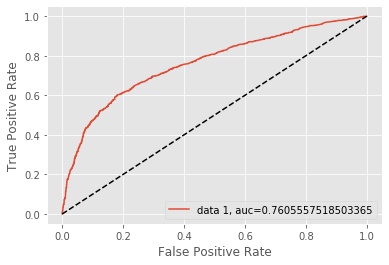

In [22]:
y_pred_proba = my_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Precision Recall Curve

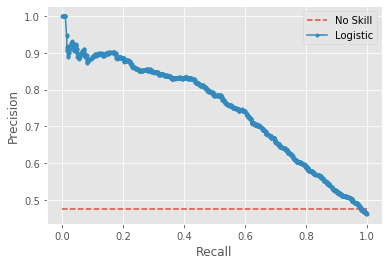

In [23]:
from sklearn.metrics import precision_recall_curve
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()